In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
#{"username":"b70sonaligarad","key":"47702e86ea0b48d4c50b29e08156b613"}

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: b70sonaligarad
Your Kaggle Key: ··········


100%|██████████| 86.8M/86.8M [00:04<00:00, 20.2MB/s]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/content/brain-tumor-classification-mri'):
   for filename in filenames:
        print(os.path.join(dirname, filename))

/content/brain-tumor-classification-mri/Testing/no_tumor/image(21).jpg
/content/brain-tumor-classification-mri/Testing/no_tumor/image(49).jpg
/content/brain-tumor-classification-mri/Testing/no_tumor/image(71).jpg
/content/brain-tumor-classification-mri/Testing/no_tumor/image(12).jpg
/content/brain-tumor-classification-mri/Testing/no_tumor/image(82).jpg
/content/brain-tumor-classification-mri/Testing/no_tumor/image(87).jpg
/content/brain-tumor-classification-mri/Testing/no_tumor/image(70).jpg
/content/brain-tumor-classification-mri/Testing/no_tumor/image(42).jpg
/content/brain-tumor-classification-mri/Testing/no_tumor/image(72).jpg
/content/brain-tumor-classification-mri/Testing/no_tumor/image(10).jpg
/content/brain-tumor-classification-mri/Testing/no_tumor/image(33).jpg
/content/brain-tumor-classification-mri/Testing/no_tumor/image(43).jpg
/content/brain-tumor-classification-mri/Testing/no_tumor/image(66).jpg
/content/brain-tumor-classification-mri/Testing/no_tumor/image(44).jpg
/conte

In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('../content/brain-tumor-classification-mri','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('../content/brain-tumor-classification-mri','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 148.12it/s]


In [ ]:

X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
X_train.shape


(3264, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16705208/16705208 [==============================] - 1s 0us/step


In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 150, 150, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 150, 150, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 150, 150, 3)          0         ['normalization[0][0]']   

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])


In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
83/83 [==============================] - ETA: 0s - loss: 0.4782 - accuracy: 0.8218
Epoch 1: val_accuracy improved from -inf to 0.79252, saving model to effnet.h5
83/83 [==============================] - 433s 5s/step - loss: 0.4782 - accuracy: 0.8218 - val_loss: 0.5601 - val_accuracy: 0.7925 - lr: 0.0010
Epoch 2/12
83/83 [==============================] - ETA: 0s - loss: 0.2056 - accuracy: 0.9304
Epoch 2: val_accuracy improved from 0.79252 to 0.90136, saving model to effnet.h5
83/83 [==============================] - 379s 5s/step - loss: 0.2056 - accuracy: 0.9304 - val_loss: 0.2688 - val_accuracy: 0.9014 - lr: 0.0010
Epoch 3/12
83/83 [==============================] - ETA: 0s - loss: 0.1218 - accuracy: 0.9588
Epoch 3: val_accuracy improved from 0.90136 to 0.95238, saving model to effnet.h5
83/83 [==============================] - 388s 5s/step - loss: 0.1218 - accuracy: 0.9588 - val_loss: 0.2001 - val_accuracy: 0.9524 - lr: 0.0010
Epoch 4/12
83/83 [============================

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 [==============================] - 11s 820ms/step


In [ ]:
print(classification_report(y_test_new,pred))


              precision    recall  f1-score   support

           0       0.99      0.94      0.96        93
           1       0.96      1.00      0.98        51
           2       0.98      0.98      0.98        96
           3       0.96      0.99      0.97        87

    accuracy                           0.97       327
   macro avg       0.97      0.98      0.97       327
weighted avg       0.97      0.97      0.97       327



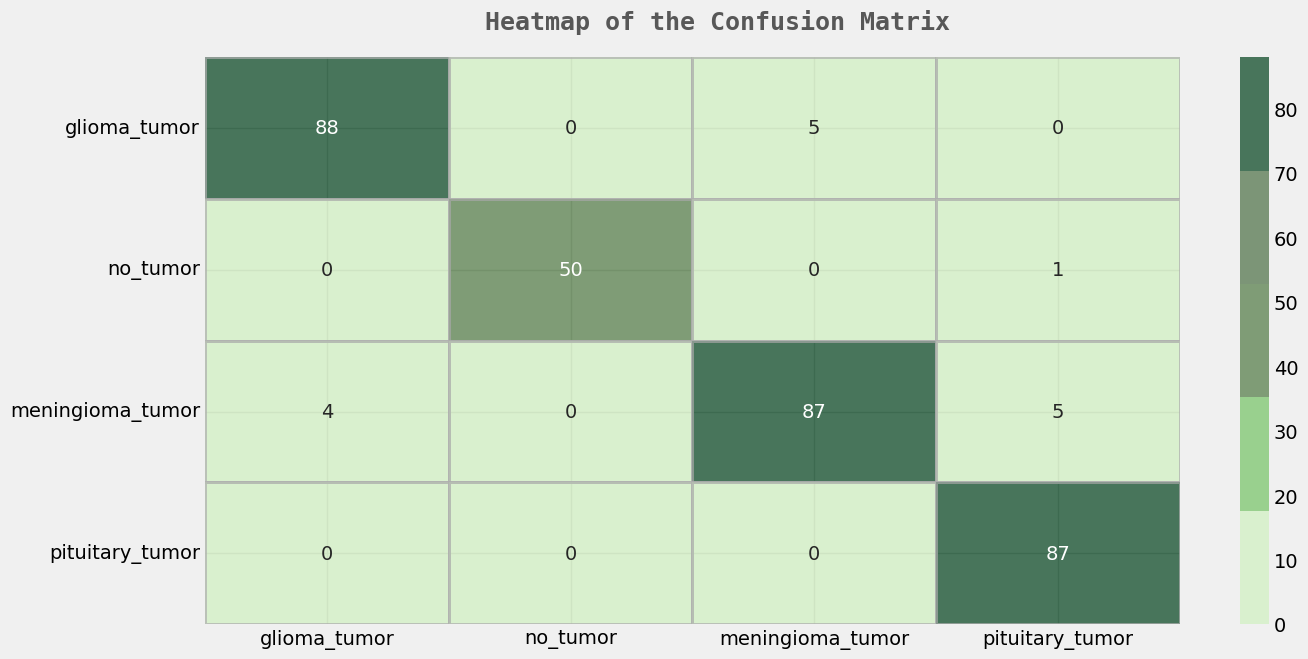

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

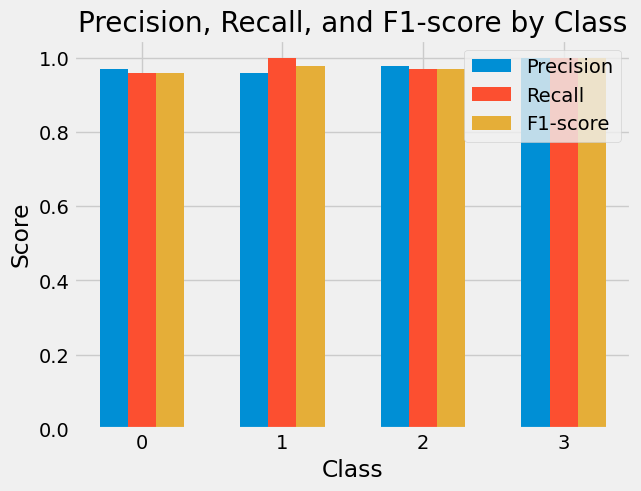

In [ ]:
import matplotlib.pyplot as plt

# Class labels
classes = [0, 1, 2, 3]

# Precision, recall, and F1-score values for each class
precision = [0.97, 0.96, 0.98, 1.00]
recall = [0.96, 1.00, 0.97, 1.00]
f1_score = [0.96, 0.98, 0.97, 1.00]

# Plotting
bar_width = 0.2
index = range(len(classes))

plt.bar(index, precision, bar_width, label='Precision')
plt.bar([i + bar_width for i in index], recall, bar_width, label='Recall')
plt.bar([i + 2*bar_width for i in index], f1_score, bar_width, label='F1-score')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score by Class')
plt.xticks([i + bar_width for i in index], classes)
plt.legend()

plt.show()


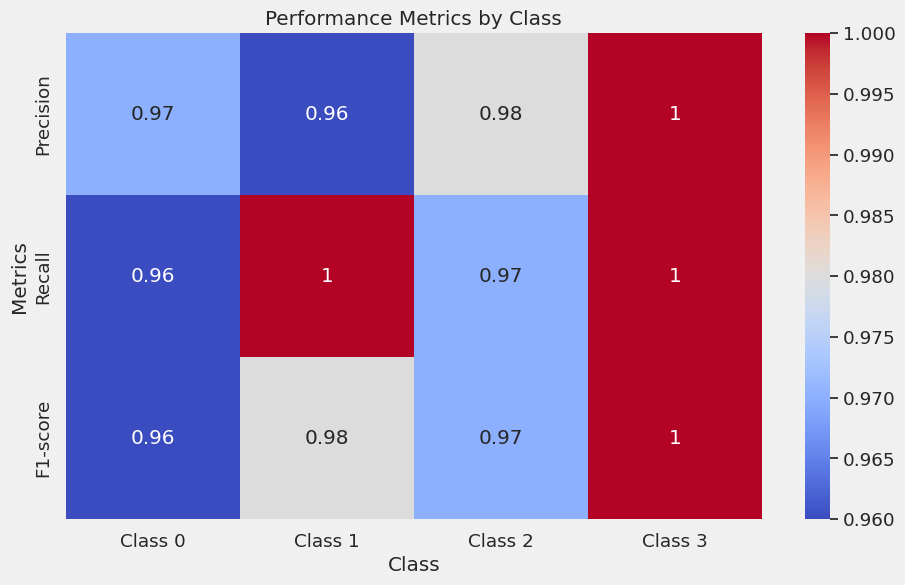

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Class labels
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Precision, recall, and F1-score values for each class
precision = [0.97, 0.96, 0.98, 1.00]
recall = [0.96, 1.00, 0.97, 1.00]
f1_score = [0.96, 0.98, 0.97, 1.00]

# Create a matrix of scores
scores_matrix = np.array([precision, recall, f1_score])

# Plotting
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(scores_matrix, annot=True, cmap='coolwarm', xticklabels=classes, yticklabels=['Precision', 'Recall', 'F1-score'])
plt.title('Performance Metrics by Class')
plt.xlabel('Class')
plt.ylabel('Metrics')

plt.show()


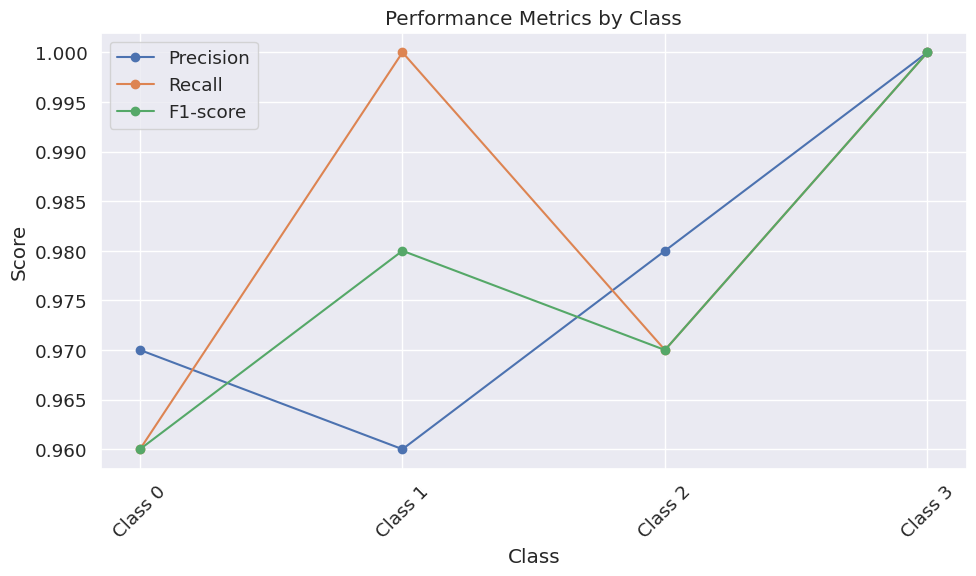

In [ ]:
import matplotlib.pyplot as plt

# Class labels
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Precision, recall, and F1-score values for each class
precision = [0.97, 0.96, 0.98, 1.00]
recall = [0.96, 1.00, 0.97, 1.00]
f1_score = [0.96, 0.98, 0.97, 1.00]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(classes, precision, marker='o', label='Precision')
plt.plot(classes, recall, marker='o', label='Recall')
plt.plot(classes, f1_score, marker='o', label='F1-score')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Performance Metrics by Class')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

In [ ]:
uploader = widgets.FileUpload()
display(uploader)


FileUpload(value={}, description='Upload')

In [ ]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)

        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])